# Concentrations of a clade in a climatic range

## Imports

In [1]:
import numpy as np
import matplotlib. pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)
import pandas as pd

In [2]:
def possible_index(df):
    for col in df.columns:
        print(col, df[col].nunique(), len(df))

In [3]:
plt_obs_id_clim = pd.read_csv('plt_obs_id_clim_examples.csv', sep=",")
print(possible_index(plt_obs_id_clim))
#plt_obs_id_clim = plt_obs_id_clim.dropna()
#plt_obs_id_clim = plt_obs_id_clim.set_index('id_st')
plt_obs_id_clim.describe()

id_clim 6953 40420
id_st 14573 40420
lon 993 40420
lat 796 40420
altitude_1km 6035 40420
plt_id_cfvvf 5 40420
abd 6 40420
None


,id_clim,id_st,lon,lat,altitude_1km,plt_id_cfvvf,abd
count,40420.000000,40420.000000,40420.000000,40420.000000,40420.000000,40420.000000,40420.000000
mean,643773.507521,106465.487679,5.639403,44.802823,815.072161,6135.338743,2.436863
std,184802.986173,63241.735544,2.350993,1.963821,602.130940,2988.695062,1.548541
min,1785.000000,72.000000,-4.374000,41.373000,-1.987962,3.000000,1.000000
25%,539012.000000,62093.000000,4.023000,43.560000,352.798663,2847.000000,1.000000
50%,729606.000000,103360.500000,6.426000,44.028000,666.459001,9027.000000,2.000000
75%,772667.000000,157556.000000,7.272000,46.134000,1190.239909,9027.000000,3.000000
max,795616.000000,221529.000000,9.558000,49.671000,3100.440061,9027.000000,6.000000


In [4]:
climat_fr = pd.read_csv('climat_fr_61_90_bis.csv', sep=",")

In [5]:
climat_fr.describe()
print(climat_fr.columns)

Index(['id', 'lon', 'lat', 'altitude_fr_1km', 'rr01_61_90', 'rr02_61_90',
       'rr03_61_90', 'rr04_61_90', 'rr05_61_90', 'rr06_61_90', 'rr07_61_90',
       'rr08_61_90', 'rr09_61_90', 'rr10_61_90', 'rr11_61_90', 'rr12_61_90',
       'tn01_61_90', 'tn02_61_90', 'tn03_61_90', 'tn04_61_90', 'tn05_61_90',
       'tn06_61_90', 'tn07_61_90', 'tn08_61_90', 'tn09_61_90', 'tn10_61_90',
       'tn11_61_90', 'tn12_61_90', 'tx01_61_90', 'tx02_61_90', 'tx03_61_90',
       'tx04_61_90', 'tx05_61_90', 'tx06_61_90', 'tx07_61_90', 'tx08_61_90',
       'tx09_61_90', 'tx10_61_90', 'tx11_61_90', 'tx12_61_90', 'classesph',
       'mat1'],
      dtype='object')


In [6]:
PLT_obs_2013_examples = pd.read_csv('PLT_obs_2013_examples.csv', sep=",")

In [7]:
PASA_2013_names_all = pd.read_csv('PASA_2013_names_all.csv', sep=",", on_bad_lines='skip')

In [8]:
pasa_var_clim_distinct_examples = pd.read_csv('pasa_var_clim_distinct_examples.csv', sep=",", on_bad_lines='skip')

## Extraction of the 5 species' names

In [9]:
names = PASA_2013_names_all
df = pasa_var_clim_distinct_examples

In [10]:
id_pasa = np.unique(df['id_pasa'])
dictionary = dict()
for id_ in id_pasa:
    latin_name = names.loc[names['id_pasa'].values == id_]['latin_name'].values[0]
    dictionary[id_] = latin_name
print(dictionary)

{1: 'ACANTHUS MOLLIS L.                                                                                                                                                                                                                                        ', 2324: 'QUERCUS ILEX L.                                                                                                                                                                                                                                           ', 4729: 'SALIX HERBACEA L.                                                                                                                                                                                                                                         ', 4882: 'BARTSCHIA ALPINA L.                                                                                                                                                                                                    

ACANTHUS MOLLIS = bear's breech, acanthe molle

QUERCUS ILEX = holm oak, chêne vert

SALIX HERBACEA = dwarf willow, saule herbacé

BARTSCHIA ALPINA = velvet bell, bartsie des Alpes

ABIES ALBA = silver fir, sapin blanc

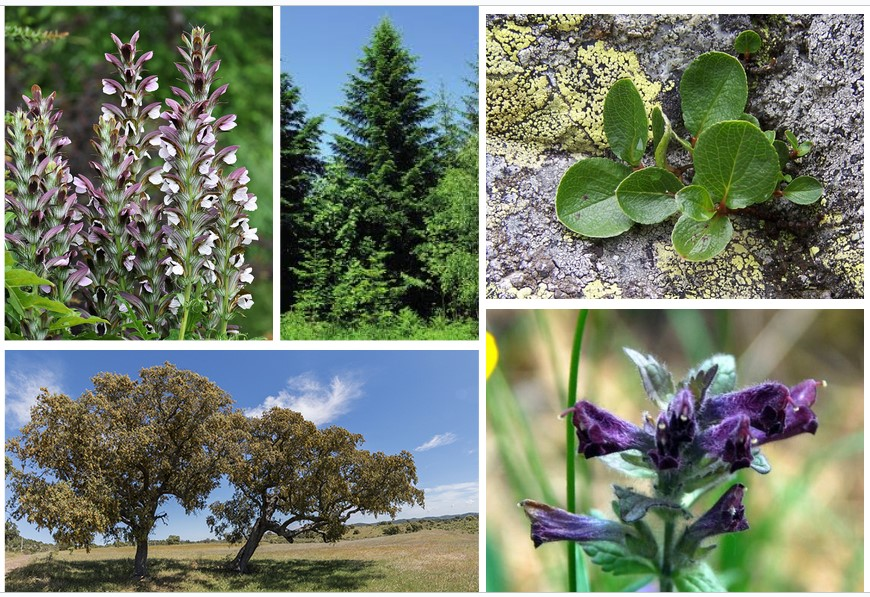

## Statistics class

In [48]:
class Statistics:
    
    def get_proximities(distrib1, distrib2):
        p, bin_edges = distrib1
        q, bin_edges = distrib2

        F = np.cumsum(q)
        u = p * (F - q /2 - 1 / 2)
        n = len(p)
        g = np.zeros(n)
 
        P, Q = np.meshgrid(p, q)
        g[0] = np.sum(np.tril((P * Q)))
        g[0] -= (p[0] * (1 - q[0])) / 2
        g[0] -= np.sum(np.dot(p, q)) / 2
        
        for k in range(n-1):
            g[k+1] = g[k] + u[k] + u[k+1]
        return g

## Definition of the Stations class

In [49]:
class Stations:
    
    dict_variables = {'rr01_61_90': 'Rainfall January', 'rr02_61_90': 'Rainfall February',
                  'rr03_61_90': 'Rainfall March', 'rr04_61_90': 'Rainfall April',
                  'rr05_61_90': 'Rainfall May', 'rr06_61_90': 'Rainfall June',
                  'rr07_61_90': 'Rainfall July', 'rr08_61_90': 'Rainfall August',
                  'rr09_61_90': 'Rainfall September', 'rr10_61_90': 'Rainfall October',
                  'rr11_61_90': 'Rainfall November', 'rr12_61_90': 'Rainfall December',
                  'tx01_61_90': 'Tmax January', 'tx02_61_90': 'Tmax February', 'tx03_61_90': 'Tmax March',
                  'tx04_61_90': 'Tmax April', 'tx05_61_90': 'Tmax May', 'tx06_61_90': 'Tmax June',
                  'tx07_61_90': 'Tmax July', 'tx08_61_90': 'Tmax August', 'tx09_61_90': 'Tmax September',
                  'tx10_61_90': 'Tmax October', 'tx11_61_90': 'Tmax November', 'tx12_61_90': 'Tmax December',
                  'tn01_61_90': 'Tmin January', 'tn02_61_90': 'Tmin February', 'tn03_61_90': 'Tmin March',
                  'tn04_61_90': 'Tmin April', 'tn05_61_90': 'Tmin May', 'tn06_61_90': 'Tmin June',
                  'tn07_61_90': 'Tmin July', 'tn08_61_90': 'Tmin August', 'tn09_61_90': 'Tmin September',
                  'tn10_61_90': 'Tmin October', 'tn11_61_90': 'Tmin November', 'tn12_61_90': 'Tmin December'}

    stations = climat_fr[dict_variables.keys()]
    distributions = dict()
    ubiquist_proximities = dict()
    for column in stations.columns:
        variable = stations[column]
        counts, bin_edges = np.histogram(variable.values, bins=np.unique(variable), density=True)
        counts /= np.sum(counts)
        distributions[column] = (counts, bin_edges)
        ubiquist_proximities[column] = Statistics.get_proximities(distributions[column], distributions[column])

## Definition of the Species class

We will define the notion of a species and its attributes: its distributions, the proximities, the concentrations and the climatic optimum.

In [84]:
class Species:
    """
    Description to be added
    """
    
    def __init__(self, id_pasa=None, plt_id_cfvvf=None, latin_name=None, data=None,
                 columns=None, distributions=None, proximities=None, concentrations=None,
                 optimums=None):
        if id_pasa is None and latin_name is None:
            id_pasa = 1
        elif id_pasa is None:
            id_pasa = int(names.loc[names['latin_name'].values == latin_name]['id_pasa'].values[0])
        self.id_pasa = id_pasa
        if plt_id_cfvvf is None:
            plt_id_cfvvf = names.loc[names['id_pasa'].values == id_pasa]['plt_id_cfvvf'].values[0]
        self.plt_id_cfvvf = plt_id_cfvvf
        if latin_name is None:
            latin_name = names.loc[names['id_pasa'].values == id_pasa]['latin_name'].values[0]
        self.latin_name = latin_name
        
        if data is None:
            data = df.loc[df['id_pasa'] == id_pasa]
            geo_data = data['lon']
            data = data.drop(columns=['id_clim', 'id_pasa', 'lon', 'lat', 'altitude_fr_1km', 'classesph', 'mat1'])
            
        self.data = data
        self.columns = data.columns
        
        self.set_distributions()
        self.set_proximities()
        self.set_concentrations()
        self.set_optimums()
        
    def __repr__(self):
        text = "| Name: " + self.latin_name
        text += "\n| ID (pasa): " + str(self.id_pasa)
        text += "\n| ID (cfvvf): " + str(self.plt_id_cfvvf)
        text += "\n| Number of samples: " + str(len(self.data))
        #text += "\n| Variables: " + str(self.data.columns)
        return text
        
    
    def set_distributions(self):
        self.distributions = dict()
        for column in self.columns:
            counts_stations, bin_edges = Stations.distributions[column]
            variable = self.data[column]
            counts, bin_edges = np.histogram(variable.values, bins=bin_edges, density=True)
            self.distributions[column] = counts / np.sum(counts), bin_edges
        
    def set_proximities(self):
        self.proximities = dict()
        for column in self.columns:
            self.proximities[column] = 1 - Statistics.get_proximities(Stations.distributions[column],
                                                                     self.distributions[column])
    
    def set_concentrations(self):
        self.concentrations = dict()
        for column in self.columns:
            g = 1 - self.proximities[column]
            g_u = 1 - Stations.ubiquist_proximities[column]
            self.concentrations[column] = 1 - g / (g_u + 10**(-6))
    
    def set_optimums(self):
        self.optimums = dict()
        for column in self.columns:
            bin_edges = self.distributions[column][1]
            concentration = self.concentrations[column]
            optimum = np.argmax(concentration)
            indicator_power = np.max(concentration)
            self.optimums[column] = (optimum, indicator_power)
    
    def plot_concentration(self, column):
        plt.plot(Stations.ubiquist_proximities[column], label="Poximity of the ubiquist species")
        plt.plot(self.proximities[column], label="Proximity of " + self.latin_name)
        plt.plot(self.concentrations[column], label='Concentration')
        plt.legend()
        plt.title('Concentration for ' + Stations.dict_variables[column])
        plt.show()
    
    def plot_hist(species, column):
        counts, bin_edges = Stations.distributions[column]
        plt.bar(x=bin_edges[:-1], height=counts, width=np.diff(bin_edges), align='edge', alpha=0.5, color='grey')
        for s in species:
            data = s.data
            if column in data.columns:
                counts, bin_edges = s.distributions[column]
                plt.bar(x=bin_edges[:-1], height=counts, width=np.diff(bin_edges),
                        align='edge', alpha=0.5, label=s.latin_name)
                plt.axvline(bin_edges[s.optimums[column][0]])
        plt.legend()
        plt.title("Distribution by " + Stations.dict_variables[column])
        plt.show()
        
    def plot_summary(self):
        labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.suptitle(self.latin_name[: 20])
        plt.setp((ax1, ax2, ax3), xticks=np.arange(12), xticklabels=labels)
        
        tmax_columns = ['tx' + str(i).zfill(2) + '_61_90' for i in range (1, 13)]
        tmax_powers = np.array([self.optimums[column][0] for column in tmax_columns])
        #tmax_t = self.distributions[tmax_columns][0]
        tmax_optimums = [self.optimums[f'tx' + str(i).zfill(2) + '_61_90'][1] for i in range (1, 13)]
        plt.xticks(np.arange(12), labels)
        ax1.bar(np.arange(12), tmax_powers)
        
        fig.tight_layout()
        plt.show()
        
        

## Examples

In [91]:
fir = Species(id_pasa=7330)
print(fir)
oak = Species(id_pasa=2324)
print(oak)
acanthus = Species(id_pasa=1)
print(acanthus)
dwarf_willow = Species(id_pasa=4729)
print(dwarf_willow)
velvet_bell = Species(id_pasa=4882)
print(velvet_bell)

| Name: ABIES ALBA MILL.                                                                                                                                                                                                                                          
| ID (pasa): 7330
| ID (cfvvf): 9027
| Number of samples: 6148
| Name: QUERCUS ILEX L.                                                                                                                                                                                                                                           
| ID (pasa): 2324
| ID (cfvvf): 2847
| Number of samples: 5136
| Name: ACANTHUS MOLLIS L.                                                                                                                                                                                                                                        
| ID (pasa): 1
| ID (cfvvf): 3
| Number of samples: 36
| Name: SALIX HERBACEA L.                 

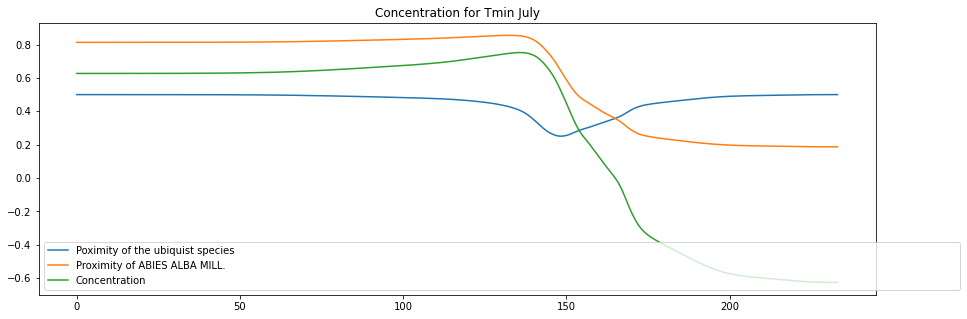

In [96]:
fir.plot_concentration('tn07_61_90')

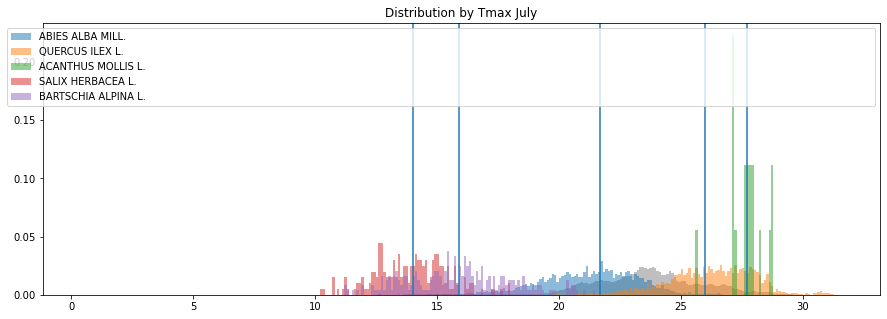

In [92]:
Species.plot_hist([fir, oak, acanthus, dwarf_willow, velvet_bell], 'tx07_61_90')

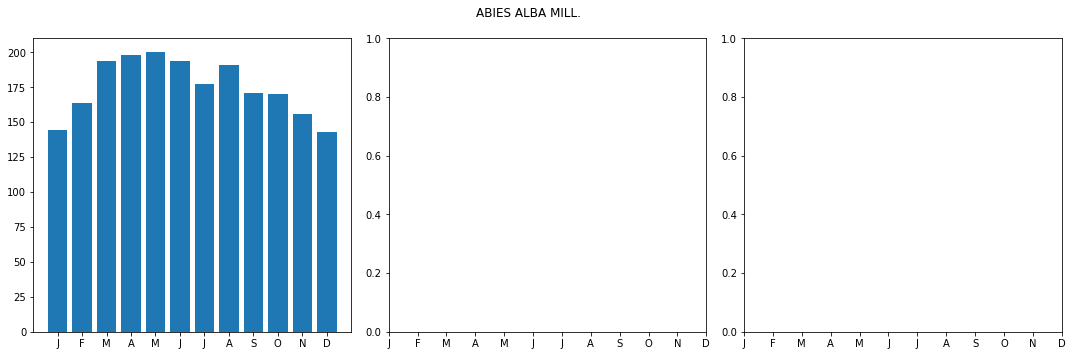

In [88]:
fir.plot_summary()

## Meeting 03/31

Questions for Emmanuel:

Estimation of climate from plants: Maximum likelihood or Bayesian inference
Let $\theta$ be the climatic variable and $S_i$ the random variable of the presence/absence of the ith species.

Toutes les données pour un test ???

Béatrice Cointe Recherche Action Forêt